<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/Module_1_Errors/ProjectPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 1



First I will define some error computing functions

In [ ]:
def absoluteError(estimate, actualValue):
  return actualValue - estimate

def relativeError(estimate, actualValue):
  return absoluteError(estimate, actualValue)/actualValue

def approximateError(previousEstimate, currentEstimate):
  return currentEstimate - previousEstimate

def relativeApproxiamteError(previousEstimate, currentEstimate):
  return approximateError(previousEstimate, currentEstimate)/currentEstimate



The above functions have been defined utilizing the other functions and utilizing naming conventions that make it clear which input belongs where.

# Ideas for Functions

* Any Inverse Trig Function
* $e^{-x^2}$ one of the most important functions in the world!
* Lambert's W function.  The solution to $We^W = x$. I'm seeing this in lots of places!


## Taylor Expansion

Next I will compute an estimate for $\sin x$ centered at $a = \frac\pi 4$.  The $n$ degree Taylor Expansion will be of the form
$$
f_n(x) = \sum_{i= 0}^n\frac{\frac{d}{dx}\sin x|_{x = \frac \pi 4}}{n!} \left(x-\frac\pi4\right)^n
$$

To continute to note that $\frac{d}{dx}\sin x|_{x = \frac \pi 4} = \left(-1\right)^{\lfloor\frac n2\rfloor} \frac{1}{\sqrt{2}}$

Thus 

$$
f_n(x) = \sum_{i=0}^n  \frac{\left(-1\right)^{\lfloor\frac n2\rfloor} }{\sqrt 2\cdot n!}
\left(x-\frac \pi 4\right)^n
$$

In order to compute these, I will need to import the math package.

In [ ]:
import math

pi = math.pi
sqrt2 = math.sqrt(2)

def generalTaylorCoefficient(degree):
  return (-1)**(math.floor(degree/2))/(sqrt2*math.factorial(degree))

def taylorPolynomialTerm(degree, input):
  return generalTaylorCoefficient(degree)*(input-pi/4)**degree

def taylorPolynomial(degree, input):
  sum = 0
  for i in range(0, degree+1):
    sum = sum +  taylorPolynomialTerm(i, input)
  return sum 

In order to make a beautiful table I am going to use the package plotly.  It is useful for creating visualizations.

In [ ]:


degree = [i for i in range(0,21)]
actualValues = [math.sin(pi/4+.1) for i in degree]
estimateValues = [taylorPolynomial(n,pi/4+.1) for n in degree]
absError = [absoluteError(estimateValues[i],actualValues[i]) for i in degree]
relError = [relativeError(estimateValues[i],actualValues[i]) for i in degree]
apxError = [approximateError(estimateValues[i],estimateValues[i+1]) for i in range(0,19)]
relApxError = [relativeApproxiamteError(estimateValues[i],estimateValues[i+1]) for i in range (0,19)]



In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
                header=dict(values=['Degree', 'Actual Value', 'Estimated Value','Absolute Error','Relative Error','Approximate Error','Relative Approximate Error']),
                 cells=dict(values = [degree,actualValues,estimateValues,absError,relError,apxError,relApxError]))
                     ])
fig.show()

We note that by the 9th degree the error has surpased the floating point error

Lastly to graph the function and the 5th order Taylor approximation I will utilize yet another couple of packages.  Numpy is very powerful even though I am just using it here to generate $x$ values and matplotlib is a library for graphing.

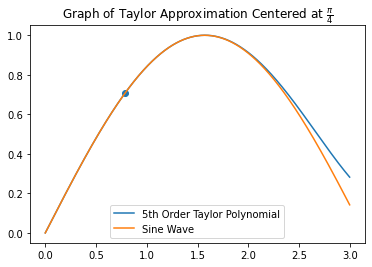

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( 0,3,.001)
plt.scatter(pi/4,1/sqrt2)
plt.plot(x,taylorPolynomial(5,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Taylor Approximation Centered at ' r'$\frac{\pi}{4}$')
plt.legend(['5th Order Taylor Polynomial', 'Sine Wave'])

plt.show()


I've played around with the $x$ values until I was satisfied with the window size.  I wanted to make sure my center was included, the 'wave' was visisble, and there was some deviation from the actual value.  I am going to try doing the 20th order to see where that one starts to deviate from the graph.

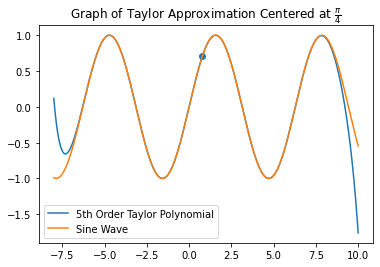

In [ ]:
x = np.arange( -8,10,.001)
plt.scatter(pi/4,1/sqrt2)
plt.plot(x,taylorPolynomial(20,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Taylor Approximation Centered at ' r'$\frac{\pi}{4}$')
plt.legend(['20th Order Taylor Polynomial', 'Sine Wave'])

plt.show()